In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
CONTENT_PATH = "/home/rkruger/Doutorado"
DATASET_NAME = "diabetes"
DATASET_PATH = f"{CONTENT_PATH}/Datasets/{DATASET_NAME}"
PREDICTIONS_PATH = f"{CONTENT_PATH}/Predictions/{DATASET_NAME}"
EPOCH_RANGE = range(1, 11)

In [3]:
class ExperimentParameters:
    epochs = 0
    dataset_length = 0
    training_ratio = 0.0
    training_length = 0
    testing_length = 0
    ring_dimension = 0
    multiplicative_depth = 0
    encrypting_time = 0.0
    training_time = 0.0
    testing_time = 0.0

In [4]:
def read_parameters(parameters_file_path):
    params = ExperimentParameters()

    with open(parameters_file_path, 'r') as f:
        for line in f:
            l_splitted_line = line.split('=')
            l_param_name = l_splitted_line[0].strip()
            l_param_value = l_splitted_line[1].strip()

            match l_param_name:
                case 'epochs':
                    params.epochs = int(l_param_value)

                case 'datasetLength':
                    params.dataset_length = int(l_param_value)

                case 'trainingRatio':
                    params.training_ratio = float(l_param_value)

                case 'trainingLength':
                    params.training_length = int(l_param_value)

                case 'testingLength':
                    params.testing_length = int(l_param_value)

                case 'ringDimension':
                    params.ring_dimension = int(l_param_value)

                case 'multiplicativeDepth':
                    params.multiplicative_depth = int(l_param_value) if l_param_value else 0

                case 'encryptingTime':
                    params.encrypting_time = float(l_param_value)

                case 'trainingTime':
                    params.training_time = float(l_param_value)

                case 'testingTime':
                    params.testing_time = float(l_param_value)

    return params

In [5]:
def read_experiment_data(p_exp_folder, p_crypto_scheme, p_algorithm, p_activation, p_epochs, p_metrics):
    if p_crypto_scheme == 'Plain':
        df_predictions = pd.read_csv(f'{p_exp_folder}/predictions.csv',
                                     header=None,
                                     names=['real', 'predicted'],
                                     dtype={'real': int, 'predicted': int})
    else:
        df_predictions = pd.read_csv(f'{p_exp_folder}/predictions.csv',
                                     header=None,
                                     names=['prediction', 'real', 'predicted'],
                                     dtype={'prediction': float, 'real': int, 'predicted': int})

    y_true = df_predictions['real'].replace(-1, 0).to_numpy()
    y_pred = df_predictions['predicted'].replace(-1, 0).to_numpy()

    l_accuracy = accuracy_score(y_true, y_pred)
    l_precision = precision_score(y_true, y_pred, zero_division=0)
    l_recall = recall_score(y_true, y_pred, zero_division=0)
    l_f1_score = f1_score(y_true, y_pred, zero_division=0)

    if os.path.isfile(f'{p_exp_folder}/parameters.csv'):
        l_exp_params = read_parameters(f'{p_exp_folder}/parameters.csv')
        l_training_time = l_exp_params.training_time
        l_testing_time = l_exp_params.testing_time
    else:
        l_training_time = 0.0
        l_testing_time = 0.0

    l_metric = [p_crypto_scheme, p_algorithm, p_activation, p_epochs, l_accuracy, l_precision, l_recall,
                l_f1_score, l_training_time, l_testing_time]

    p_metrics.append(l_metric)

In [6]:
g_metrics = []

for epoch_id in EPOCH_RANGE:
    l_exp_folder = f'{PREDICTIONS_PATH}/ckks_tanh_{epoch_id}'
    read_experiment_data(l_exp_folder, 'CKKS', 'Perceptron', 'tanh', epoch_id, g_metrics)

for epoch_id in EPOCH_RANGE:
    l_exp_folder = f'{PREDICTIONS_PATH}/ckks_sigmoid_{epoch_id}'
    read_experiment_data(l_exp_folder, 'CKKS', 'Perceptron', 'sigmoid', epoch_id, g_metrics)

#for epoch_id in epoch_range:
#    l_exp_folder = f'{PREDICTIONS_PATH}/ckks_identity_{epoch_id}'
#    read_experiment_data(l_exp_folder, 'CKKS', 'Perceptron', 'identity', epoch_id, l_metrics)

for epoch_id in EPOCH_RANGE:
    l_exp_folder = f'{PREDICTIONS_PATH}/plain_tanh_{epoch_id}'
    read_experiment_data(l_exp_folder, 'Plain', 'Perceptron', 'tanh', epoch_id, g_metrics)

for epoch_id in EPOCH_RANGE:
    l_exp_folder = f'{PREDICTIONS_PATH}/plain_sigmoid_{epoch_id}'
    read_experiment_data(l_exp_folder, 'Plain', 'Perceptron', 'sigmoid', epoch_id, g_metrics)

df_metrics = pd.DataFrame(g_metrics,
                          columns=['Crypto Scheme', 'Algorithm', 'Activation', 'Epochs', 'Accuracy',
                                   'Precision', 'Recall', 'F1-score', 'Training Time', 'Testing Time'])
df_metrics

,Crypto Scheme,Algorithm,Activation,Epochs,Accuracy,Precision,Recall,F1-score,Training Time,Testing Time
0,CKKS,Perceptron,tanh,1,0.350649,0.350649,1.000000,0.519231,895.182062,374.496164
1,CKKS,Perceptron,tanh,2,0.350649,0.349345,0.987654,0.516129,1796.078411,384.553298
2,CKKS,Perceptron,tanh,3,0.367965,0.355556,0.987654,0.522876,2575.172086,361.271641
3,CKKS,Perceptron,tanh,4,0.385281,0.361991,0.987654,0.529801,3362.631819,355.162914
4,CKKS,Perceptron,tanh,5,0.389610,0.363636,0.987654,0.531561,4473.037473,384.379390
5,CKKS,Perceptron,tanh,6,0.393939,0.365297,0.987654,0.533333,5555.163015,405.978375
6,CKKS,Perceptron,tanh,7,0.393939,0.365297,0.987654,0.533333,6473.283246,397.177345
7,CKKS,Perceptron,tanh,8,0.393939,0.365297,0.987654,0.533333,6968.750309,373.019054
8,CKKS,Perceptron,tanh,9,0.393939,0.365297,0.987654,0.533333,8444.206756,401.796657
9,CKKS,Perceptron,tanh,10,0.398268,0.366972,0.987654,0.535117,9423.388444,387.987824


In [7]:
sns.set_theme(style="ticks", palette="Spectral")

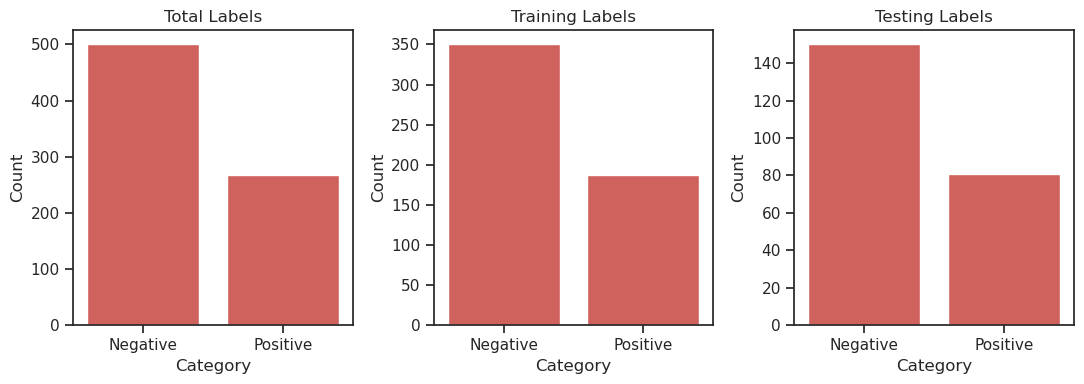

In [8]:
df_train = pd.read_csv(f'{DATASET_PATH}/training_labels_range11.csv', header=None)
df_test = pd.read_csv(f'{DATASET_PATH}/testing_labels_range11.csv', header=None)

# Assign column name
df_train['Dataset'] = 'Training'
df_test['Dataset'] = 'Testing'

# Define category order
if DATASET_NAME == 'diabetes':
    category_order = ['Negative', 'Positive']
else:
    category_order = ['Benign', 'Malignant']

# Map diagnosis labels
df_train['Diagnosis'] = df_train[0].replace({0: category_order[0], 1: category_order[1]})
df_test['Diagnosis'] = df_test[0].replace({0: category_order[0], 1: category_order[1]})

# Concatenate both datasets
df_total = pd.concat([df_train, df_test])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(11, 4))

# Plot total labels
sns.countplot(data=df_total, x='Diagnosis', order=category_order, ax=axes[0])
axes[0].set_title('Total Labels')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Plot training labels
sns.countplot(data=df_train, x='Diagnosis', order=category_order, ax=axes[1])
axes[1].set_title('Training Labels')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')

# Plot testing labels
sns.countplot(data=df_test, x='Diagnosis', order=category_order, ax=axes[2])
axes[2].set_title('Testing Labels')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

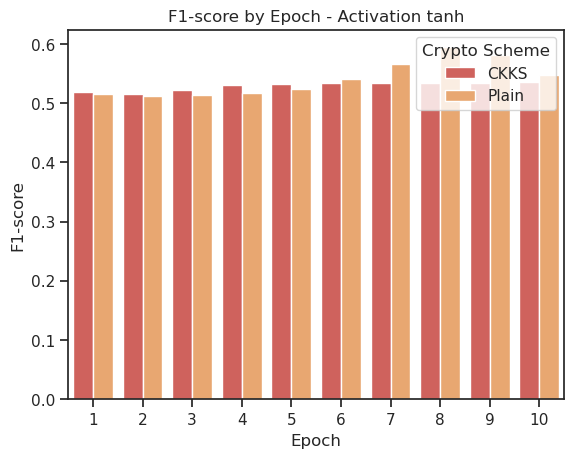

In [9]:
filtered_df = df_metrics[df_metrics['Activation'] == 'tanh']
sns.barplot(data=filtered_df, x='Epochs', hue='Crypto Scheme', y='F1-score')
plt.title("F1-score by Epoch - Activation tanh")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

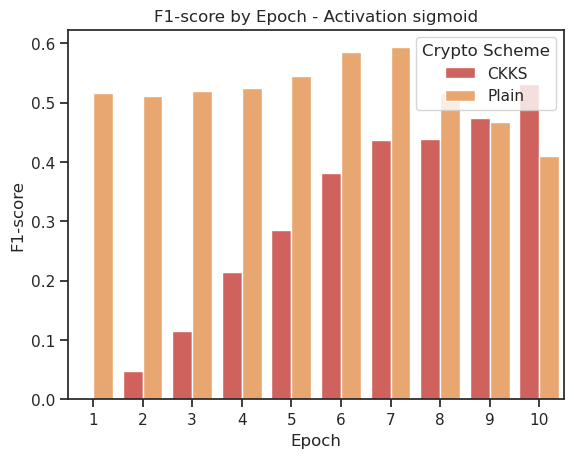

In [10]:
filtered_df = df_metrics[df_metrics['Activation'] == 'sigmoid']
sns.barplot(data=filtered_df, x='Epochs', hue='Crypto Scheme', y='F1-score')
plt.title("F1-score by Epoch - Activation sigmoid")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

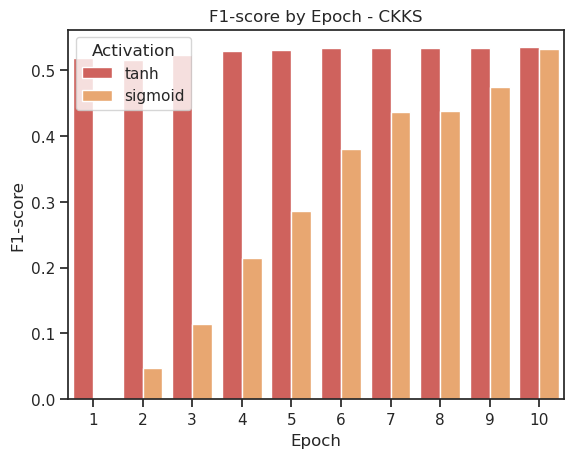

In [11]:
filtered_df = df_metrics[df_metrics['Crypto Scheme'] == 'CKKS']
sns.barplot(data=filtered_df, x='Epochs', hue='Activation', y='F1-score')
plt.title("F1-score by Epoch - CKKS")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

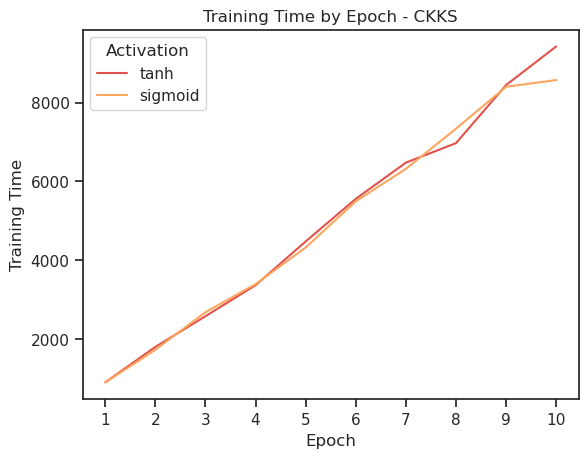

In [12]:
filtered_df = df_metrics[df_metrics['Crypto Scheme'] == 'CKKS']
sns.lineplot(data=filtered_df, x='Epochs', hue='Activation', y='Training Time')
plt.title("Training Time by Epoch - CKKS")
plt.xlabel("Epoch")
plt.ylabel("Training Time")
plt.xticks(range(1, 11))
plt.show()

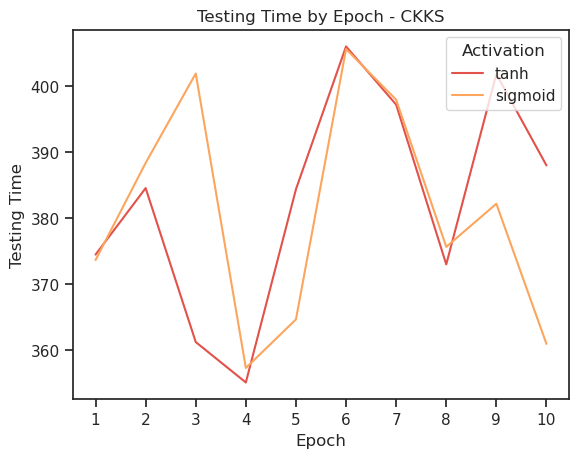

In [13]:
filtered_df = df_metrics[df_metrics['Crypto Scheme'] == 'CKKS']
sns.lineplot(data=filtered_df, x='Epochs', hue='Activation', y='Testing Time')
plt.title("Testing Time by Epoch - CKKS")
plt.xlabel("Epoch")
plt.ylabel("Testing Time")
plt.xticks(range(1, 11))
plt.show()

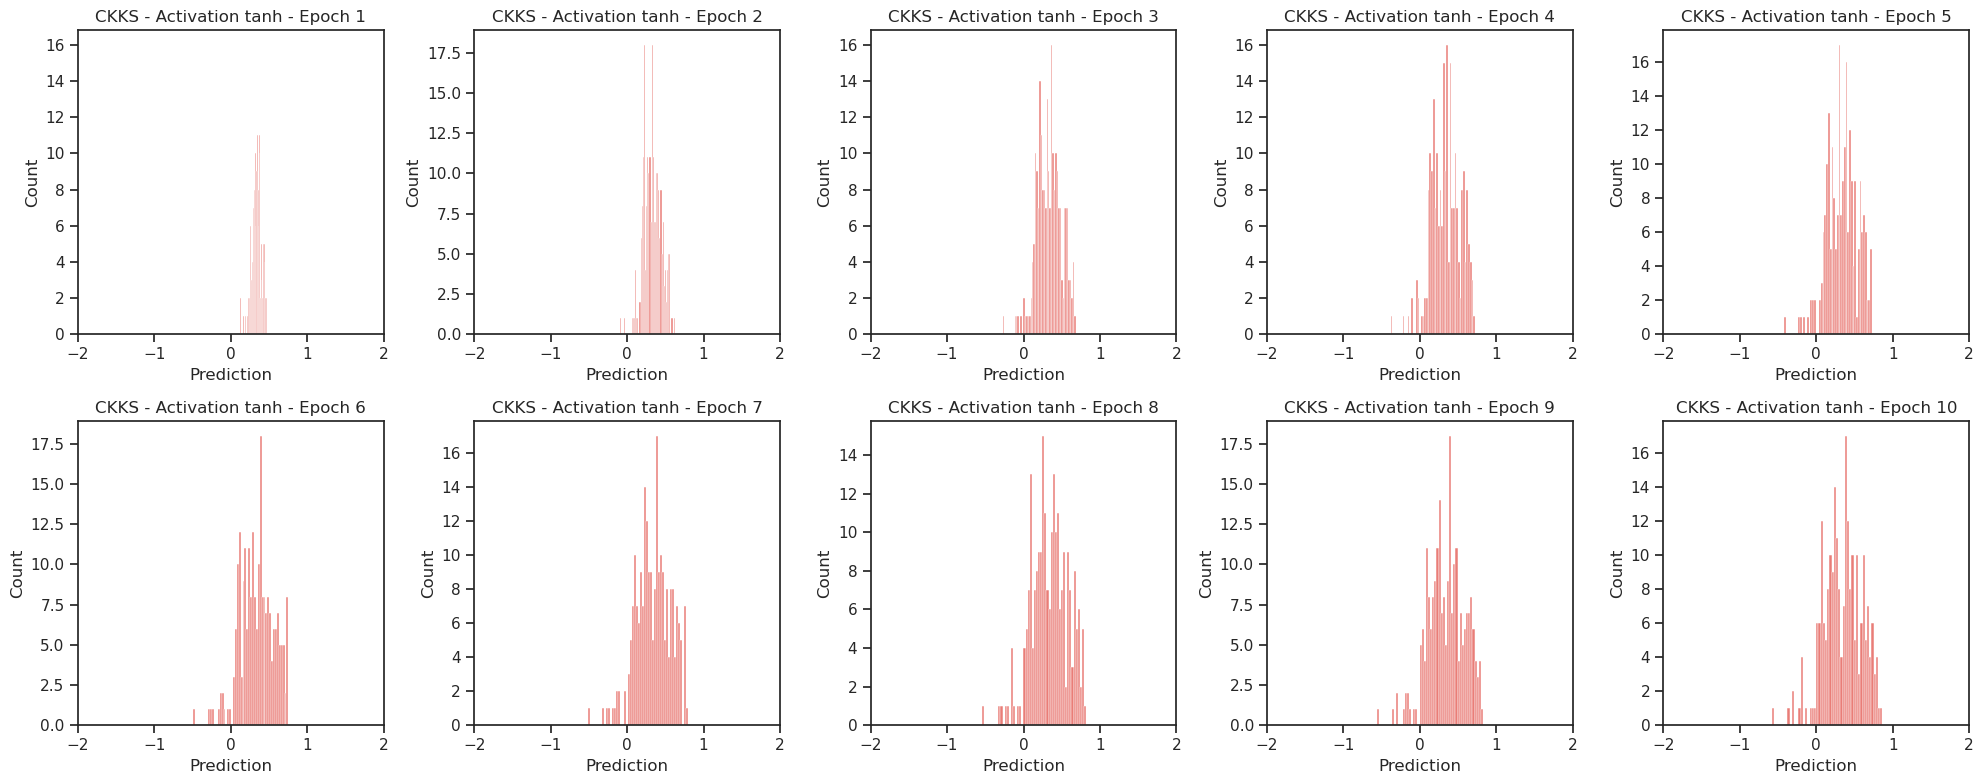

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for epoch in EPOCH_RANGE:
    df_predictions2 = pd.read_csv(f'{PREDICTIONS_PATH}/ckks_tanh_{epoch}/predictions.csv',
                                  header=None,
                                  names=['prediction', 'real', 'predicted'],
                                  dtype={'prediction': float, 'real': int, 'predicted': int})

    idx = epoch - 1
    sns.histplot(data=df_predictions2, x='prediction', bins=50, ax=axes[idx])
    axes[idx].set_xlim(-2.0, 2.0)
    axes[idx].set_title(f'CKKS - Activation tanh - Epoch {epoch}')
    axes[idx].set_xlabel('Prediction')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

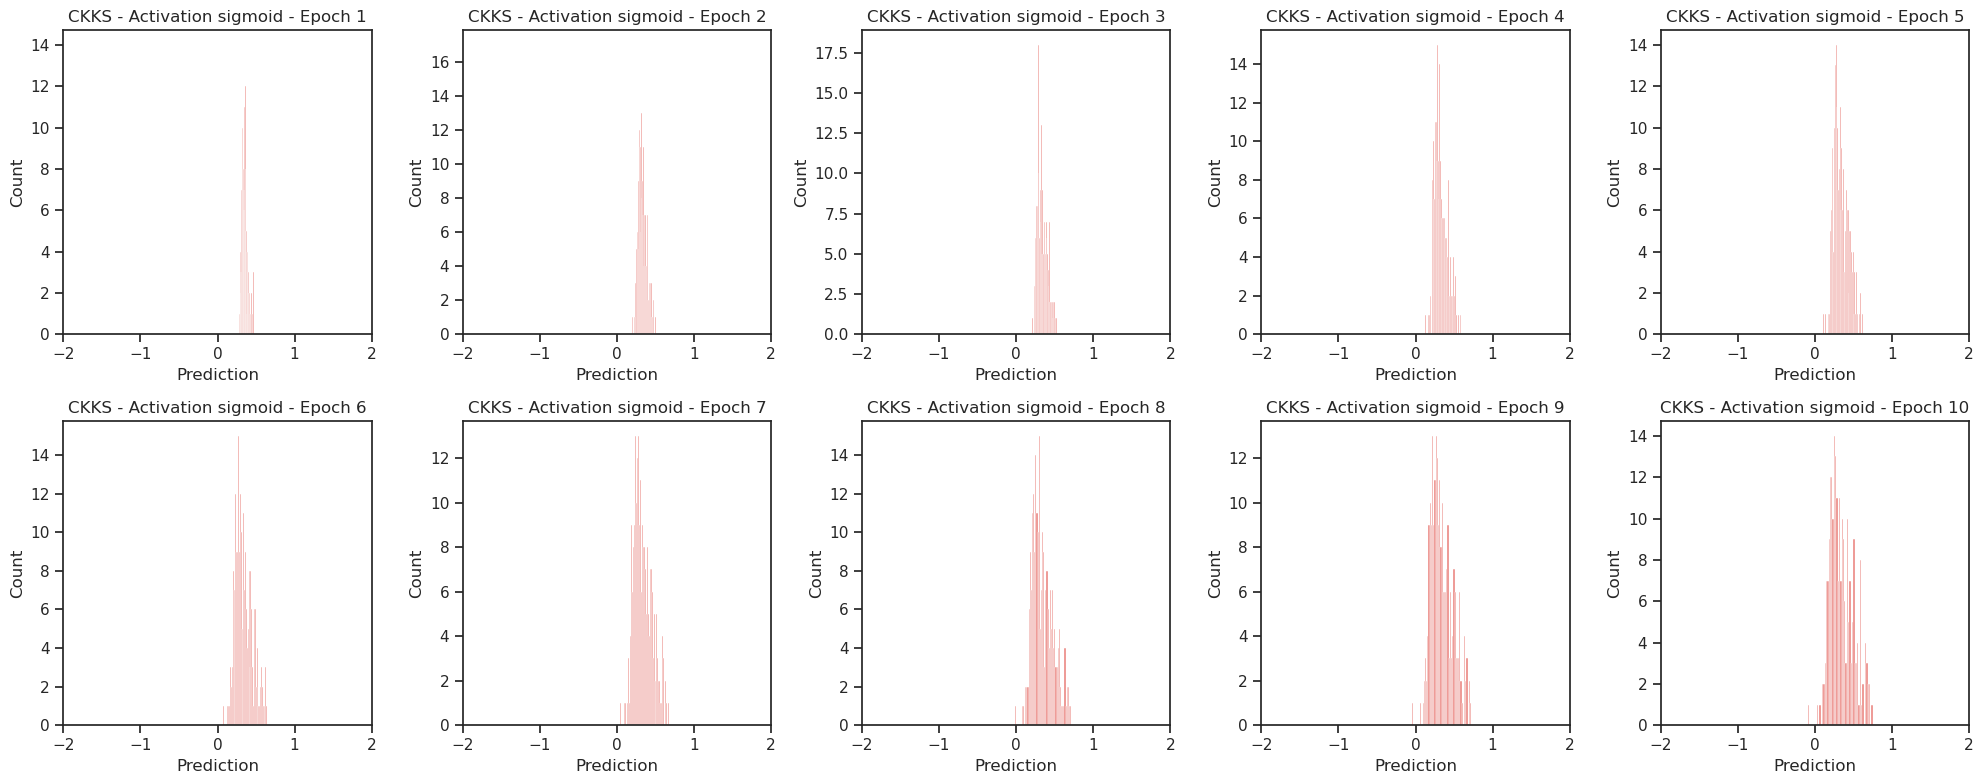

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for epoch in EPOCH_RANGE:
    df_predictions2 = pd.read_csv(f'{PREDICTIONS_PATH}/ckks_sigmoid_{epoch}/predictions.csv',
                                  header=None,
                                  names=['prediction', 'real', 'predicted'],
                                  dtype={'prediction': float, 'real': int, 'predicted': int})

    idx = epoch - 1
    sns.histplot(data=df_predictions2, x='prediction', bins=50, ax=axes[idx])
    axes[idx].set_xlim(-2.0, 2.0)
    axes[idx].set_title(f'CKKS - Activation sigmoid - Epoch {epoch}')
    axes[idx].set_xlabel('Prediction')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()